# Module 10 Application

## Challenge: Crypto Clustering

In this Challenge, you’ll combine your financial Python programming skills with the new unsupervised learning skills that you acquired in this module.

The CSV file provided for this challenge contains price change data of cryptocurrencies in different periods.

The steps for this challenge are broken out into the following sections:

* Import the Data (provided in the starter code)
* Prepare the Data (provided in the starter code)
* Find the Best Value for `k` Using the Original Data
* Cluster Cryptocurrencies with K-means Using the Original Data
* Optimize Clusters with Principal Component Analysis
* Find the Best Value for `k` Using the PCA Data
* Cluster the Cryptocurrencies with K-means Using the PCA Data
* Visualize and Compare the Results

### Import the Data

This section imports the data into a new DataFrame. It follows these steps:

1. Read  the “crypto_market_data.csv” file from the Resources folder into a DataFrame, and use `index_col="coin_id"` to set the cryptocurrency name as the index. Review the DataFrame.

2. Generate the summary statistics, and use HvPlot to visualize your data to observe what your DataFrame contains.


> **Rewind:** The [Pandas`describe()`function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) generates summary statistics for a DataFrame. 

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

This section prepares the data before running the K-Means algorithm. It follows these steps:

1. Use the `StandardScaler` module from scikit-learn to normalize the CSV file data. This will require you to utilize the `fit_transform` function.

2. Create a DataFrame that contains the scaled data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.


In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data

In this section, you will use the elbow method to find the best value for `k`.

1. Code the elbow method algorithm to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following question: What is the best value for `k`?

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values_original = range(1, 11)

In [8]:
# Create an empy list to store the inertia values
inertia_values_original = []

In [9]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

for k in k_values_original:
    kmeans_original = KMeans(n_clusters=k, random_state=0)
    kmeans_original.fit(df_market_data_scaled)
    inertia_values_original.append(kmeans_original.inertia_)

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values_original, "inertia": inertia_values_original}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


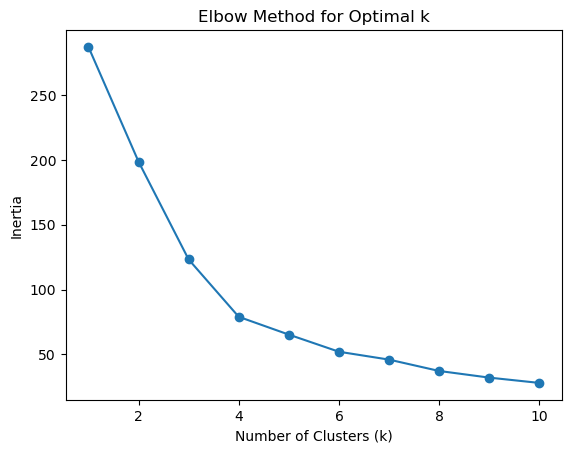

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(k_values_original, inertia_values_original, marker='o', label='Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** best_k = 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In this section, you will use the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the original data.

3. Predict the clusters to group the cryptocurrencies using the original data. View the resulting array of cluster values.

4. Create a copy of the original data and add a new column with the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [12]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [13]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = kmeans.predict(df_market_data_scaled)

# View the resulting array of cluster values.
cluster_values

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
df_with_clusters = df_market_data_scaled.copy()


In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['Cluster'] = cluster_values
# Display sample data
df_with_clusters['Cluster']

coin_id
bitcoin                 2
ethereum                2
tether                  0
ripple                  0
bitcoin-cash            2
binancecoin             2
chainlink               2
cardano                 2
litecoin                2
bitcoin-cash-sv         0
crypto-com-chain        0
usd-coin                0
eos                     0
monero                  2
tron                    0
tezos                   2
okb                     0
stellar                 0
cosmos                  2
cdai                    0
neo                     0
wrapped-bitcoin         2
leo-token               0
huobi-token             0
nem                     0
binance-usd             0
iota                    0
vechain                 0
zcash                   2
theta-token             0
dash                    0
ethereum-classic        0
ethlend                 1
maker                   2
havven                  0
omisego                 0
celsius-degree-token    3
ontology                0
ftx-

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_with_clusters.hvplot.scatter(x="price_change_percentage_24h", 
                                y="price_change_percentage_7d", 
                                by='Cluster', 
                                hover_cols=['crypto_name'])

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis

In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.

1. Create a PCA model instance and set `n_components=3`.

2. Use the PCA model to reduce to three principal components. View the first five rows of the DataFrame. 

3. Retrieve the explained variance to determine how much information can be attributed to each principal component.

4. Answer the following question: What is the total explained variance of the three principal components?

5. Create a new DataFrame with the PCA data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
df_market_data_pca = pd.DataFrame(data=df_market_data_pca, columns=['PC1', 'PC2', 'PC3'])
print(df_market_data_pca.head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance)
print(f'Total Explained Variance: {total_explained_variance:.4f}')

Total Explained Variance: 0.8950


#### Answer the following question: What is the total explained variance of the three principal components?

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance: 0.8950

In [21]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
df_market_data_pca['coin_id'] = df_market_data_scaled.index

# Copy the crypto names from the original data
df_market_data_pca_new =df_market_data_pca.copy()

# Set the coinid column as index
df_market_data_pca_new['coin_id'] = df_market_data_scaled.index
df_market_data_pca_new.set_index('coin_id', inplace=True)
# Display sample data
df_market_data_pca.head()

,PC1,PC2,PC3,coin_id
0,-0.600667,0.842760,0.461595,bitcoin
1,-0.458261,0.458466,0.952877,ethereum
2,-0.433070,-0.168126,-0.641752,tether
3,-0.471835,-0.222660,-0.479053,ripple
4,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In this section, you will use the elbow method to find the best value for `k` using the PCA data.

1. Code the elbow method algorithm and use the PCA data to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = range(1, 11)

In [23]:
# Create an empy list to store the inertia values
inertia_values_pca = []

In [24]:
df_market_data_pca_new.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [25]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(df_market_data_pca_new)
    inertia_values_pca.append(kmeans_pca.inertia_)

# Print the computed inertia values
print(inertia_values_pca)

[256.8740855678926, 168.8118963068523, 93.77462568057305, 49.66549665179739, 37.83946598681245, 27.72062619489982, 21.182775862957342, 17.016962140077435, 13.668324883664063, 10.48489048597693]


In [26]:
# Create a dictionary with the data to plot the Elbow curve
# elbow_data = {'k_values_pca': range(1, 11), 'inertia_values_pca': inertia_values_pca}

elbow_data = {
    'k_values_original': k_values_original,
    'inertia_values_original': inertia_values_original,
    'k_values_pca': k_values_pca,
    'inertia_values_pca': inertia_values_pca
}


# Create a DataFrame with the data to plot the Elbow curve
# df_elbow_pca = pd.DataFrame({'k_values_pca': k_values_pca, 'inertia_values_pca': inertia_values_pca})
df_elbow = pd.DataFrame(elbow_data)

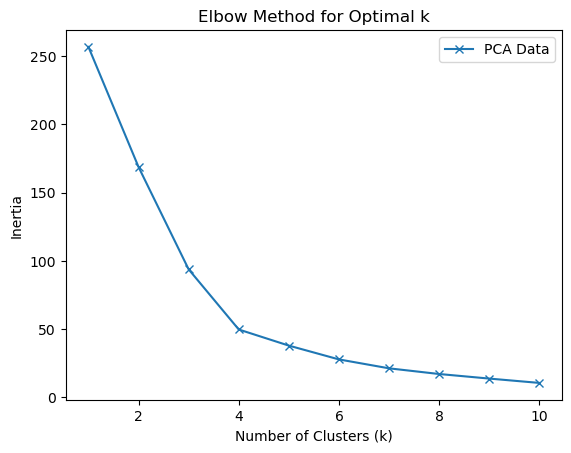

In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(k_values_pca, inertia_values_pca, marker='x', label='PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

#### Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** # The value is slightly lower than the original data

---

### Cluster Cryptocurrencies with K-means Using the PCA Data

In this section, you will use the PCA data and the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the principal components.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the PCA data.

3. Predict the clusters to group the cryptocurrencies using the PCA data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the PCA data to store the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [28]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [29]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_market_data_pca_new)

KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values_pca = kmeans_pca.predict(df_market_data_pca_new)

# View the resulting array of cluster values.
cluster_values_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [31]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_market_data_pca_new.copy()

# Add a new column to the DataFrame with the predicted clusters

df_pca_with_clusters['Cluster_PCA'] = cluster_values_pca
# Display sample data
df_pca_with_clusters['Cluster_PCA']

coin_id
bitcoin                 2
ethereum                2
tether                  0
ripple                  0
bitcoin-cash            2
binancecoin             2
chainlink               2
cardano                 2
litecoin                2
bitcoin-cash-sv         0
crypto-com-chain        0
usd-coin                0
eos                     0
monero                  2
tron                    0
tezos                   2
okb                     0
stellar                 0
cosmos                  2
cdai                    0
neo                     0
wrapped-bitcoin         2
leo-token               0
huobi-token             0
nem                     0
binance-usd             0
iota                    0
vechain                 0
zcash                   2
theta-token             0
dash                    0
ethereum-classic        0
ethlend                 1
maker                   2
havven                  0
omisego                 0
celsius-degree-token    3
ontology                0
ftx-

In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_with_clusters.hvplot.scatter(x="PC1", 
                                    y="PC2", 
                                    by='Cluster_PCA', 
                                    hover_cols=['crypto_name'])

:NdOverlay   [Cluster_PCA]
   :Scatter   [PC1]   (PC2)

---

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

1. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the Elbow Curve that you created to find the best value for `k` with the original and the PCA data.

2. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the cryptocurrencies clusters using the original and the PCA data.

3. Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

> **Rewind:** Back in Lesson 3 of Module 6, you learned how to create composite plots. You can look at that lesson to review how to make these plots; also, you can check [the hvPlot documentation](https://holoviz.org/tutorial/Composing_Plots.html).

In [36]:
# Composite plot to contrast the Elbow curves

elbow_curve_original = df_elbow.hvplot.line(x='k_values_original', y='inertia_values_original', label='Original Data', line_color='blue')
elbow_curve_pca = df_elbow.hvplot.line(x='k_values_pca', y='inertia_values_pca', label='PCA Data', line_color='orange')

elbow_composite_plot = elbow_curve_original + elbow_curve_pca
elbow_composite_plot

:Layout
   .Curve.Original_Data :Curve   [k_values_original]   (inertia_values_original)
   .Curve.PCA_Data      :Curve   [k_values_pca]   (inertia_values_pca)

In [40]:
# Composite plot to contrast the clusters
# Create a composite plot to contrast the clusters using original and PCA data
scatter_original = df_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h", y="price_change_percentage_7d", by='Cluster', hover_cols=['crypto_name'], label='Original Data', color='blue')
scatter_pca = df_pca_with_clusters.hvplot.scatter(
    x="PC1", y="PC2", by='Cluster_PCA', hover_cols=['crypto_name'], label='PCA Data', color='orange')

scatter_composite_plot = scatter_original + scatter_pca
scatter_composite_plot

:Layout
   .NdOverlay.Original_Data :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.PCA_Data      :NdOverlay   [Cluster_PCA]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
Using PCA reduces the dimensionality of the data, which can lead to faster computation times and reduced memory usage. This is especially valuable for large datasets.
The clusters in the reduced feature space (PCA space) may have more clearly defined patterns or separations. This can make it easier to interpret and analyze the clusters.

While PCA reduces dimensionality, it also means that some information from the original features is lost. The reduced feature space may not capture all the variability present in the data.

Clustering in three dimensions (PCA space) can be visually inspected more easily compared to clustering in a higher-dimensional space. It allows for better visualization of the clusters.

Using fewer features may lead to more robust and generalized clustering results, as it reduces the risk of overfitting to noise or irrelevant features.

The choice of which features to include in PCA can impact the clustering results. Selecting relevant features is crucial for achieving meaningful clusters.